In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
print(os.getcwd())

/home/nico/project_code/ScanDy


If we want to run this notebook on Google Colab, we first have to install `ScanDy` and download the required dataset from Google drive. The following code cell will prepare all of this for us.

In [ ]:
# install the ScanDy framework via pip
!pip install scandy

# download the VidCom_example dataset from google drive using gdown
!pip install gdown
# dataset is stored at https://drive.google.com/file/d/14kJDD_5ECP2vhgonhn5iQ5qnREDIqTTr/view?usp=sharing 
file_id = '14kJDD_5ECP2vhgonhn5iQ5qnREDIqTTr'
url = f"https://drive.google.com/uc?id={file_id}"
output = 'vidcom_example.zip'
!gdown $url -O $output
!unzip $output

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scandy.models.LocationModel import LocationModel
from scandy.utils.dataclass import Dataset
import scandy.utils.functions as uf

# Extending on existing models

In this example, we show how an existing model can be adapted to a different hypothesis. In this example, we compare the default location-based model with a version that is identical except for module (II), where we now assume that the visual sensitivity spreads across the currently foveated object.

## Overwrite a model method

The modular design of ScanDy allows us to create such a location-based model with an object-based visual sensitivity in a very simple way. 

Before showing it on a scanpath model, we exemplify how the method is overwritten on the foolowing dummy class:

In [3]:
class dummy:
    def __init__(self):
        self.a = 0
        self.b = 0
    def update_a(self):
        self.a = self.a+1
    def update_b(self):
        self.b = self.b+self.a
    def run(self):
        self.update_a()
        self.update_b()

c = dummy()
c.run()
print("Default behavior: ", c.b)
# Define a new method
def new_update_a(self):
    self.a = self.a+10
c_new = dummy()
# Bind the new method to the class and run again
c_new.update_a = new_update_a.__get__(c_new, dummy)
c_new.run()
print("New method: ", c_new.b)


Default behavior:  1
New method:  10


## Initialization of the default model

In [4]:
datadict = {
    "PATH": "VidCom_example/",  # previously downloaded & extracted dataset  
    'FPS' : 30,
    'PX_TO_DVA' : 0.06,
    'FRAMES_ALL_VIDS' : 300,
    'gt_foveation_df' : '2021-12-04_VidCom_GT_fov_df',
    "outputpath" : os.getcwd()+"/examples/"
}
VidCom = Dataset(datadict)

Load the model and set parameters in a way that a reasonable number of saccades are made.

In [5]:
L_ll = LocationModel(VidCom)
L_ll.params["ddm_thres"] = 1.5
L_ll.params["ddm_sig"] = 0.03
L_ll.params

{'rs': None,
 'startpos': array([270, 480]),
 'ior_decay': 30.0,
 'ior_dva': 2.0,
 'att_dva': 6.0,
 'ddm_thres': 1.5,
 'ddm_sig': 0.03,
 'drift_sig': 2.0833333333333335,
 'use_flow': True,
 'use_objects': False,
 'use_objectfiles': False,
 'centerbias': 'anisotropic_default',
 'featuretype': 'molin',
 'sglrun_return': True}

Run the model and show the resulting scanpath as dataframe.

In [6]:
L_ll.run('field03', seeds = [42])
L_ll.evaluate_all_to_df()
L_ll._all_iors = None # free up some RAM...
L_ll.result_df

/home/nico/project_code/ScanDy/scandy/models/model.py:482: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result_df = self.result_df.append(df_trial, ignore_index=True)


,nfov,video,subject,frame_start,frame_end,duration_ms,x_start,y_start,x_end,y_end,object,sac_amp_dva,sac_angle_h,sac_angle_p,fov_category,ret_times
0,0,field03,seed042,0,7,266.666667,480,270,476,262,Ground,NaN,NaN,NaN,B,NaN
1,1,field03,seed042,8,13,200.000000,386,258,387,251,Ground,5.405331,-177.455196,NaN,B,NaN
2,2,field03,seed042,14,20,233.333333,385,263,383,263,Ground,0.729932,99.462322,-83.082482,B,NaN
3,3,field03,seed042,21,27,233.333333,372,306,364,306,Ground,2.663081,104.349332,4.887010,B,NaN
4,4,field03,seed042,28,39,400.000000,374,310,366,308,Ground,0.646220,21.801409,-82.547923,B,NaN
5,5,field03,seed042,40,49,333.333333,336,357,332,362,Ground,3.447260,121.476839,99.675430,B,NaN
6,6,field03,seed042,50,61,400.000000,328,355,330,347,Ground,0.483735,-119.744881,118.778279,B,NaN
7,7,field03,seed042,62,67,200.000000,387,248,386,250,Ground,6.854196,-60.068488,59.676393,B,NaN
8,8,field03,seed042,68,78,366.666667,385,255,376,254,Ground,0.305941,101.309932,161.378421,B,NaN
9,9,field03,seed042,79,87,300.000000,375,302,370,308,Ground,2.880625,91.193489,-10.116443,B,NaN


## Redefine module (II)

We now comapre this with a location-based model with the same parameters, where the visual sensitivity is object-based.

For this we overwrite the `update sensitivity()` function of the `LocationModel` class. 

In [7]:
def new_oba_update_sensitivity(self):
    # this part is as in the original function...
    assert self.params is not None, "Model parameters not loaded"
    gaze_gaussian = uf.gaussian_2d(
        self._gaze_loc[0],
        self._gaze_loc[1],
        self.Dataset.VID_SIZE_X,
        self.Dataset.VID_SIZE_Y,
        self.params["att_dva"] * self.Dataset.DVA_TO_PX,
    )
    # ... but here we add a new condition, if the gaze is on an object
    # we set the sensitivity across the mask to 1.0
    gaze_obj_id = self.video_data.object_masks[self._current_frame][self._gaze_loc[1], self._gaze_loc[0]]
    if gaze_obj_id > 0:
        gaze_gaussian[self.video_data.object_masks[self._current_frame]==gaze_obj_id] = 1.0

    self._sens_map = gaze_gaussian
    if self.params["sglrun_return"]:
        self._all_sens.append(self._sens_map.copy())


This means that the location-based model needs object information, which is not provided by default. Hence we will have to change the `Model.params['use_objects']` entry in the parameter dictionary such that the `Model.load_video()` function of the base class loads the object segmentation masks. All the other parameters and the random seed for the model run are the same to ensure comparability.

In [8]:
new_params = L_ll.params
new_params['use_objects'] = True

L_ll_os = LocationModel(VidCom, params = new_params)
L_ll_os.update_sensitivity = new_oba_update_sensitivity.__get__(L_ll_os, LocationModel)


After the new method was assigned to the location based model (with low-level features and) object-based sensitivity, we can run the model again and compare the resulting scanpaths.

In [9]:
L_ll_os.run('field03', seeds = [42])
L_ll_os.evaluate_all_to_df()
L_ll_os.result_df

/home/nico/project_code/ScanDy/scandy/models/model.py:482: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.result_df = self.result_df.append(df_trial, ignore_index=True)


,nfov,video,subject,frame_start,frame_end,duration_ms,x_start,y_start,x_end,y_end,object,sac_amp_dva,sac_angle_h,sac_angle_p,fov_category,ret_times
0,0,field03,seed042,0,7,266.666667,480,270,476,262,Ground,NaN,NaN,NaN,B,NaN
1,1,field03,seed042,8,13,200.000000,386,258,387,251,Ground,5.405331,-177.455196,NaN,B,NaN
2,2,field03,seed042,14,20,233.333333,385,263,383,263,Ground,0.729932,99.462322,-83.082482,B,NaN
3,3,field03,seed042,21,27,233.333333,372,306,364,306,Ground,2.663081,104.349332,4.887010,B,NaN
4,4,field03,seed042,28,39,400.000000,374,310,366,308,Ground,0.646220,21.801409,-82.547923,B,NaN
5,5,field03,seed042,40,49,333.333333,336,357,332,362,Ground,3.447260,121.476839,99.675430,B,NaN
6,6,field03,seed042,50,61,400.000000,328,355,330,347,Ground,0.483735,-119.744881,118.778279,B,NaN
7,7,field03,seed042,62,67,200.000000,387,248,386,250,Ground,6.854196,-60.068488,59.676393,B,NaN
8,8,field03,seed042,68,78,366.666667,385,255,376,254,Ground,0.305941,101.309932,161.378421,B,NaN
9,9,field03,seed042,79,87,300.000000,375,302,370,308,Ground,2.880625,91.193489,-10.116443,B,NaN


We find, that the scanpaths are identical until the first object is foveated. 

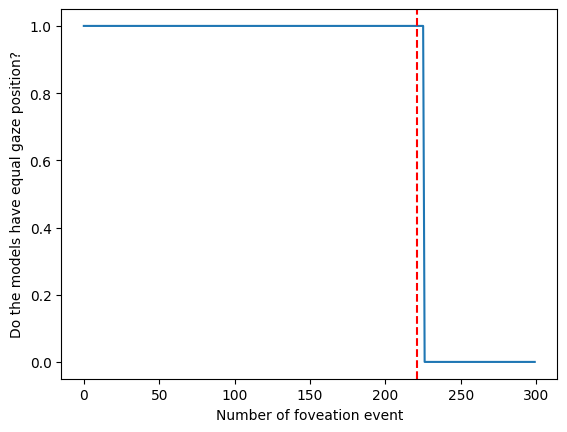

In [10]:
f_first_obj = L_ll_os.result_df[L_ll_os.result_df.object != "Ground"].frame_start.iloc[0]

plt.plot([np.array_equal(L_ll._scanpath[f], L_ll_os._scanpath[f]) for f in range(len(L_ll._scanpath))])
# plot vertical line at f_first_obj
plt.axvline(x=f_first_obj, color='r', linestyle='--')
plt.xlabel("Number of foveation event")
plt.ylabel("Do the models have equal gaze position?")
plt.show()

To show when our modification starts to influence the scanpath, we can plot the saccade targets (for easy visualization just on a single frame).

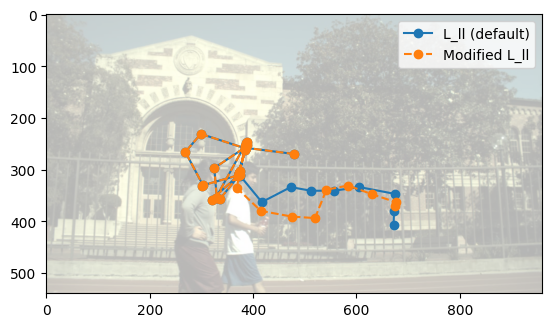

In [11]:
frame = 224
plt.imshow(VidCom.load_videoframes("field03")[frame], cmap="jet", alpha=0.3)
plt.plot(L_ll.result_df.x_start, L_ll.result_df.y_start, 'o-', label = 'L_ll (default)')
plt.plot(L_ll_os.result_df.x_start, L_ll_os.result_df.y_start, 'o--', label = 'Modified L_ll')

plt.legend(); plt.show()

We find the reason for this deviation, by construction, in the visual sensitivity, which we can plot by accessing the `_all_sens` attribute of the model.

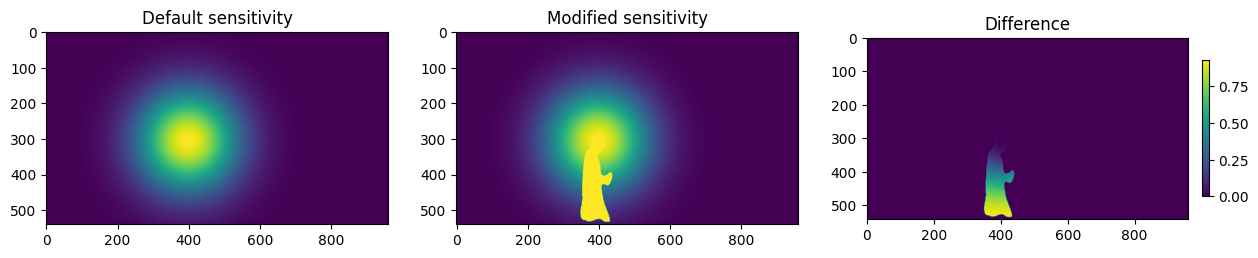

In [12]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(L_ll._all_sens[frame]); axs[0].set_title("Default sensitivity")
axs[1].imshow(L_ll_os._all_sens[frame]); axs[1].set_title("Modified sensitivity")
dif = axs[2].imshow(L_ll_os._all_sens[frame] - L_ll._all_sens[frame]); axs[2].set_title("Difference")
plt.colorbar(dif, fraction=0.02, pad=0.04)
plt.show()

This leads through the multiplicative combination of the modules to a differnt accumulated efidence 

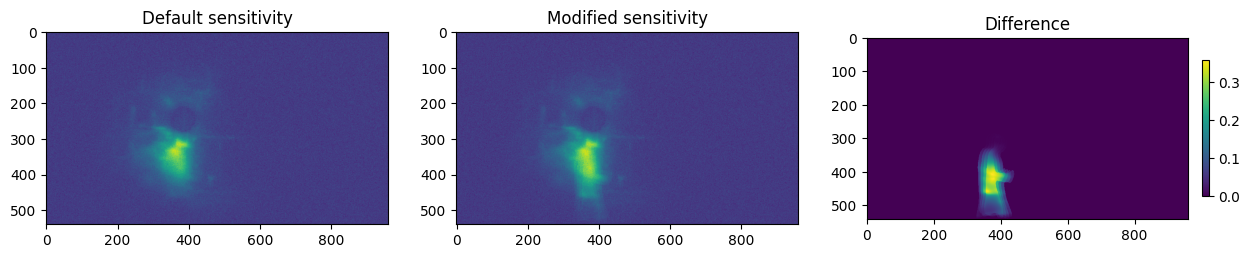

In [13]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(L_ll._all_dvs[frame]); axs[0].set_title("Default sensitivity")
axs[1].imshow(L_ll_os._all_dvs[frame]); axs[1].set_title("Modified sensitivity")
dif = axs[2].imshow(L_ll_os._all_dvs[frame] - L_ll._all_dvs[frame]); axs[2].set_title("Difference")
plt.colorbar(dif, fraction=0.02, pad=0.04)

plt.show()

We can now compare the two different versions of the model in a more detailed way. If we want to draw conclusions on which model better describes attentional selection in humans, we should make a quantitative comparison as shown in `ex2_model_comparison.ipynb`

Inspirations for other changes to the default models are provided in the docstrings (marked with `TRYOUT: ...`) of the implementations of all modules in the `LocationModel` and `ObjectModel` classes.

____________________________________________________________________